<a href="https://colab.research.google.com/github/ydstiroa/Repo_TLKM/blob/main/Predict_MaxUtil_Link_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fbprophet

In [12]:
from google.colab import drive
drive._mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import fbprophet

print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [14]:
dataset = r'drive/My Drive/Colab Notebooks/data.xlsx'
dataset


'drive/My Drive/Colab Notebooks/data.xlsx'

In [15]:
import pandas as pd

df = pd.read_excel(dataset)
df.head()

,Unnamed: 0,Date,MaxUtil_Link_1,Capacity_1,MaxUtil_Link_2,Capacity_2
0,NaN,2020-01-01,199.94,300,128.21,200
1,NaN,2020-02-01,198.01,300,129.8,200
2,NaN,2020-03-01,197.19,300,124.44,200
3,NaN,2020-04-01,206.93,300,127.55,200
4,NaN,2020-05-01,228.66,400,130.25,200


In [16]:
df = df.drop(columns=['Unnamed: 0'])

In [17]:
df = df[df['MaxUtil_Link_1']!='-']

In [18]:
df

,Date,MaxUtil_Link_1,Capacity_1,MaxUtil_Link_2,Capacity_2
0,2020-01-01,199.94,300,128.21,200
1,2020-02-01,198.01,300,129.8,200
2,2020-03-01,197.19,300,124.44,200
3,2020-04-01,206.93,300,127.55,200
4,2020-05-01,228.66,400,130.25,200
5,2020-06-01,236.45,400,133.02,200
6,2020-07-01,240.9,400,132.24,200
7,2020-08-01,248.15,400,137,200
8,2020-09-01,253.59,400,144.85,200
9,2020-10-01,353.61,400,144.5,200


In [19]:
df =  df.drop(columns=['Capacity_1','MaxUtil_Link_2','Capacity_2'])

In [21]:
df = df.rename(columns={"Date": "ds", "MaxUtil_Link_1": "y"})

In [ ]:
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [ ]:
# df = df[df['ds'] < "2021-01-01"] #cek akurasi

In [22]:
from fbprophet import Prophet

# define the model
model = Prophet()
# fit the model
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


In [ ]:
# from pandas import DataFrame
# from pandas import to_datetime

# future = list()
# for i in range(1, 13):
# 	date = '2021-%02d' % i
# 	future.append([date])
# future = DataFrame(future)
# future.columns = ['ds']
# future['ds']= to_datetime(future['ds'])

In [23]:
from pandas import DataFrame
from pandas import to_datetime

count = 2021

future = list()
for i in range(1, 17):
  if i>12:
    if i%13==0:
      count +=1
    i=i-12


  date = str(count)+'-%02d' % i
  future.append([date])

future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

In [24]:
future

,ds
0,2021-01-01
1,2021-02-01
2,2021-03-01
3,2021-04-01
4,2021-05-01
5,2021-06-01
6,2021-07-01
7,2021-08-01
8,2021-09-01
9,2021-10-01


          ds        yhat  yhat_lower  yhat_upper
0 2021-01-01  325.567862  298.480624  353.530475
1 2021-02-01  338.262763  307.329538  364.534968
2 2021-03-01  349.729175  323.138367  377.762407
3 2021-04-01  362.424134  336.101752  389.995954
4 2021-05-01  374.709579  346.183731  400.931298


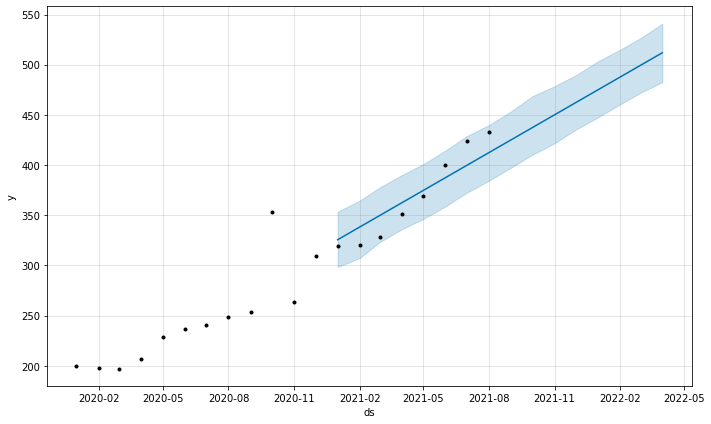

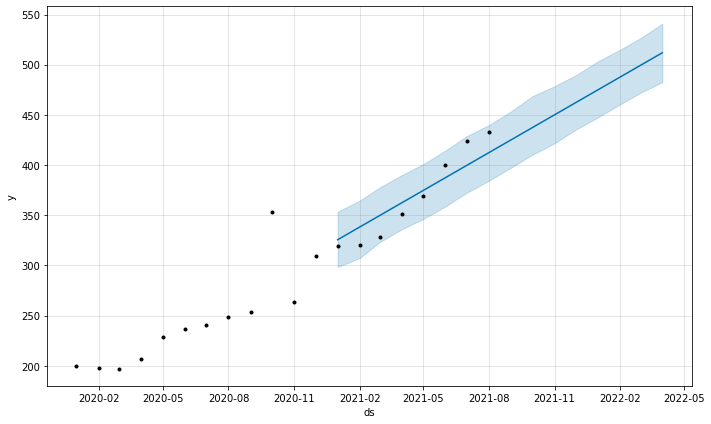

In [25]:
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
# pyplot.show()

In [26]:
sampai_agustus = forecast['yhat'][:8].values

In [27]:
real = df['y'][12:20].values

In [28]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,325.567862,298.480624,353.530475,325.567862,325.567862,0.0,0.0,0.0,0.0,0.0,0.0,325.567862
1,2021-02-01,338.262763,307.329538,364.534968,338.262763,338.262763,0.0,0.0,0.0,0.0,0.0,0.0,338.262763
2,2021-03-01,349.729175,323.138367,377.762407,349.729175,349.729175,0.0,0.0,0.0,0.0,0.0,0.0,349.729175
3,2021-04-01,362.424134,336.101752,389.995954,362.424134,362.424134,0.0,0.0,0.0,0.0,0.0,0.0,362.424134
4,2021-05-01,374.709579,346.183731,400.931298,374.709579,374.709579,0.0,0.0,0.0,0.0,0.0,0.0,374.709579
5,2021-06-01,387.404540,358.750211,414.456666,387.404540,387.404540,0.0,0.0,0.0,0.0,0.0,0.0,387.404540
6,2021-07-01,399.689985,372.443871,428.822025,399.689985,399.689985,0.0,0.0,0.0,0.0,0.0,0.0,399.689985
7,2021-08-01,412.384945,384.364992,439.870074,412.384945,412.384945,0.0,0.0,0.0,0.0,0.0,0.0,412.384945
8,2021-09-01,425.079905,397.424040,453.502250,425.079902,425.079908,0.0,0.0,0.0,0.0,0.0,0.0,425.079905
9,2021-10-01,437.365350,410.323254,468.637470,437.365340,437.365361,0.0,0.0,0.0,0.0,0.0,0.0,437.365350


In [29]:
df

,ds,y
0,2020-01-01,199.94
1,2020-02-01,198.01
2,2020-03-01,197.19
3,2020-04-01,206.93
4,2020-05-01,228.66
5,2020-06-01,236.45
6,2020-07-01,240.9
7,2020-08-01,248.15
8,2020-09-01,253.59
9,2020-10-01,353.61


In [31]:
from sklearn.metrics import r2_score
r2_score(sampai_agustus, real)

0.6675655549656564

In [32]:
for x in range(len(real)):
  print(str(sampai_agustus[x])+'==='+str(real[x]))

325.5678621535882===319.04
338.2627626639617===320.51
349.72917454605306===328.21
362.4241341873572===351.21
374.7095794606817===369.5
387.40453957645036===399.57
399.6899848497749===423.9
412.3849449655435===433.2


In [33]:
sampai_agustus

array([325.56786215, 338.26276266, 349.72917455, 362.42413419,
       374.70957946, 387.40453958, 399.68998485, 412.38494497])

In [34]:
real

array([319.04, 320.51, 328.21, 351.21, 369.5, 399.57, 423.9, 433.2],
      dtype=object)